In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import configparser
import os.path
from os import path
from importlib import reload
import wandb


creds_path_ar = ["../../credentials.ini","credentials.colab.ini"]
PATH_ROOT = ""
PATH_DATA = ""

for creds_path in creds_path_ar:
    if path.exists(creds_path):
        config_parser = configparser.ConfigParser()
        config_parser.read(creds_path)
        PATH_ROOT = config_parser['MAIN']["PATH_ROOT"]
        PATH_DATA = config_parser['MAIN']["PATH_DATA"]
        WANDB_enable = config_parser['MAIN']["WANDB_ENABLE"] == 'TRUE'
        ENV = config_parser['MAIN']["ENV"]
        break

if ENV=="COLAB":
  from google.colab import drive
  mount_path = '/content/gdrive/'
  drive.mount(mount_path)

In [16]:
if WANDB_enable == True:
    wandb.init(project="[SS]Adding_data")
    os.environ['WANDB_NOTEBOOK_NAME'] = '[SS]Alexnet_pytorch'

wandb: ERROR Not authenticated.  Copy a key from https://app.wandb.ai/authorize
wandb: Appending key for api.wandb.ai to your netrc file: /home/ubuntu/.netrc


Failed to query for notebook name, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable
wandb: Wandb version 0.9.6 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


In [4]:
cd {PATH_ROOT}

/home/ubuntu/sota-mafat-radar


In [5]:
import os
import random
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
import torch.optim as optim


from sklearn.metrics import roc_auc_score, roc_curve, auc, accuracy_score
from matplotlib.colors import LinearSegmentedColormap
from termcolor import colored

from src.data import feat_data, get_data
from src.models import arch_setup, base_base_model, alex_model

# Set seed for reproducibility of results
seed_value = 0
os.environ['PYTHONHASHSEED']=str(seed_value)


random.seed(seed_value)
np.random.seed(seed_value)
torch.manual_seed(0)

torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

if torch.cuda.is_available():
    device = torch.device('cuda:0')
else:
    device = torch.device('cpu:0')

In [6]:
from src.data import get_data_pipeline

In [41]:
config = dict()
config['get_horizontal_flip'] = True
config['get_vertical_flip'] = False


In [42]:
train_x, train_y, val_x, val_y = get_data_pipeline.pipeline_trainval(PATH_ROOT+PATH_DATA, config)

/home/ubuntu/sota-mafat-radar/data/
/home/ubuntu/sota-mafat-radar/data/


In [43]:
train_set = arch_setup.DS(train_x,train_y)
val_set= arch_setup.DS(val_x,val_y)

train_loader=DataLoader(dataset= train_set, batch_size = 32, shuffle = True, num_workers = 2)
val_loader=DataLoader(dataset= val_set, batch_size = 32, shuffle = True, num_workers = 2)

In [44]:
model= alex_model.alex_mdf_s_model()
# model.apply(init_weights)
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

model.to(device)

alex_mdf_s_model(
  (features): Sequential(
    (0): Conv2d(1, 32, kernel_size=(7, 7), stride=(2, 2), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (3): Conv2d(32, 128, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (6): Conv2d(128, 256, kernel_size=(3, 3), stride=(2, 2), padding=(2, 2))
    (7): ReLU(inplace=True)
    (8): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (9): Conv2d(256, 128, kernel_size=(3, 3), stride=(2, 2), padding=(2, 2))
    (10): ReLU(inplace=True)
    (11): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (12): Conv2d(128, 128, kernel_size=(3, 3), stride=(2, 2), padding=(2, 2))
    (13): ReLU(inplace=True)
    (14): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  )
  (avg

In [45]:
if WANDB_enable == True:
    wandb.watch(model)

In [46]:
wandb.log(config)

wandb: Wandb version 0.9.6 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


In [47]:
log = arch_setup.train_epochs(train_loader,val_loader,model,criterion,optimizer,num_epochs= 10,device=device,train_y=train_y,val_y=val_y, WANDB_enable = True, wandb= wandb)

started training epoch no. 1
wandb: Wandb version 0.9.6 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade
epoch : 1.0000, loss : 402.7186, auc : 0.9640, acc : 0.9349, val_loss : 3.8328, val_auc : 0.9153, val_acc : 0.8576, 
---------------------------

started training epoch no. 2
epoch : 2.0000, loss : 269.5442, auc : 0.9845, acc : 0.9588, val_loss : 4.1043, val_auc : 0.9236, val_acc : 0.8058, 
---------------------------

started training epoch no. 3
epoch : 3.0000, loss : 294.4984, auc : 0.9821, acc : 0.9572, val_loss : 5.0319, val_auc : 0.9213, val_acc : 0.8285, 
---------------------------

started training epoch no. 4
epoch : 4.0000, loss : 258.8093, auc : 0.9864, acc : 0.9617, val_loss : 4.1016, val_auc : 0.9298, val_acc : 0.8479, 
---------------------------

started training epoch no. 5
epoch : 5.0000, loss : 321.4591, auc : 0.9800, acc : 0.9556, val_loss : 4.6611, val_auc : 0.8856, val_acc : 0.7864, 
---------------------------

started training epoc

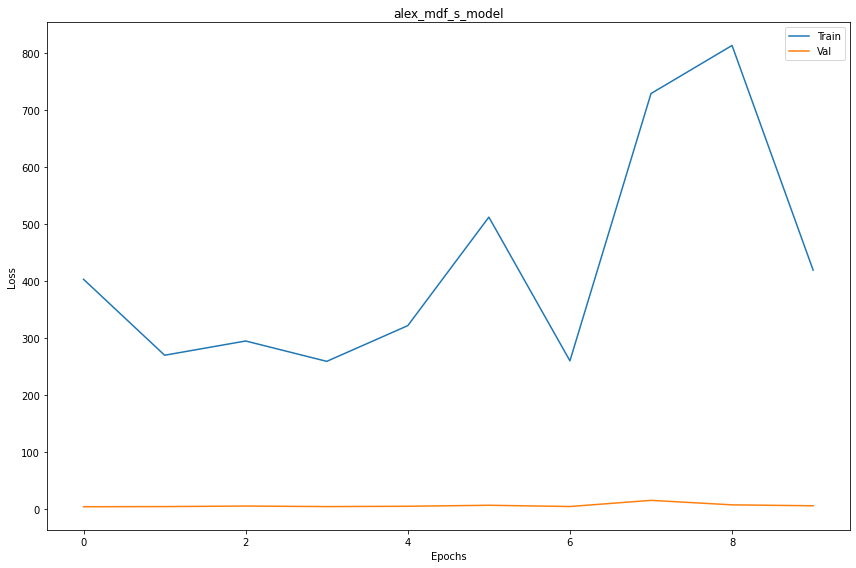

In [48]:
arch_setup.plot_loss_train_test(log,model)

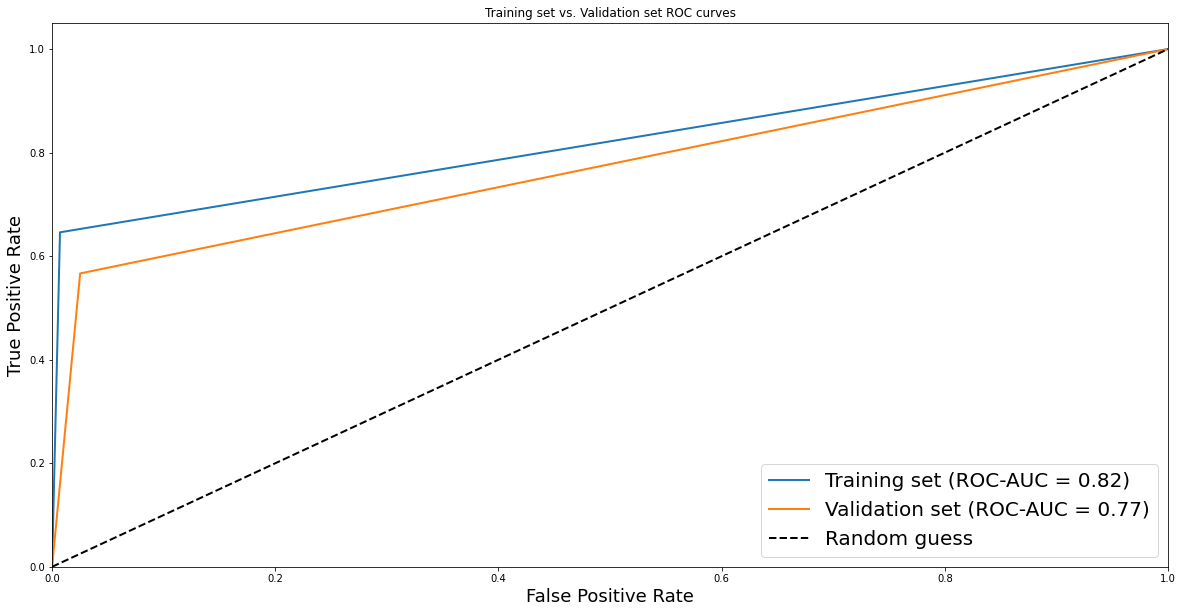

In [53]:
arch_setup.plot_ROC_local_gpu(train_loader,val_loader,model,device)